In [1]:
#import Pandas and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file into a dataframe df
df=pd.read_csv('https://raw.githubusercontent.com/LiyaElizabethGeorge/ClassProjects/main/NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
#review data types
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [4]:
#convert object to date
df['ARREST_DATE']=pd.to_datetime(df['ARREST_DATE'],errors='raise').dt.normalize()

In [5]:
df.dtypes

ARREST_KEY                           int64
ARREST_DATE                 datetime64[ns]
PD_CD                              float64
PD_DESC                             object
KY_CD                              float64
OFNS_DESC                           object
LAW_CODE                            object
LAW_CAT_CD                          object
ARREST_BORO                         object
ARREST_PRECINCT                      int64
JURISDICTION_CODE                    int64
AGE_GROUP                           object
PERP_SEX                            object
PERP_RACE                           object
X_COORD_CD                           int64
Y_COORD_CD                           int64
Latitude                           float64
Longitude                          float64
New Georeferenced Column            object
dtype: object

In [6]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,2023-02-07,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,2023-01-04,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,2023-01-10,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,2023-02-27,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,2023-01-07,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)


In [7]:
df.shape

(54576, 19)

In [8]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.457600e+04,54325.000000,54325.000000,54576.000000,54576.000000,5.457600e+04,54576.000000,54576.000000,54576.000000
mean,2.635819e+08,430.457174,251.346618,63.581849,0.967147,1.005843e+06,208315.449337,40.737667,-73.920633
std,1.401601e+06,277.973670,149.381441,34.536247,7.865097,2.176083e+04,29773.620121,0.192568,0.325643
min,2.611809e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.251844
25%,2.623376e+08,115.000000,113.000000,40.000000,0.000000,9.916260e+05,186030.250000,40.677230,-73.973423
50%,2.635892e+08,397.000000,236.000000,63.000000,0.000000,1.005731e+06,206632.500000,40.733736,-73.922475
75%,2.647476e+08,705.000000,344.000000,101.000000,0.000000,1.017750e+06,236537.000000,40.815904,-73.879103
max,2.660041e+08,972.000000,995.000000,123.000000,97.000000,1.066940e+06,271819.000000,40.912714,0.000000


In [9]:
#as per data dictionary provided; Jurisdiction responsible for the arrest.  
#0 Patrol
#1 Transit
#2 Housing
#3 and above - non NYPD jurisdictions
df.groupby('JURISDICTION_CODE')['ARREST_KEY'].count().sort_values()

JURISDICTION_CODE
85        1
88        1
69        1
6         2
4        23
7        27
14       42
87       43
71       52
11       90
73      107
72      114
97      168
15      185
3       475
2      2159
1      2404
0     48682
Name: ARREST_KEY, dtype: int64

'Patrol' jurisdiction has recorded the most arrests

In [10]:
# Which kind of offense is most recorded?
df.groupby('OFNS_DESC')['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      7888
PETIT LARCENY                     5868
FELONY ASSAULT                    4948
DANGEROUS DRUGS                   3623
VEHICLE AND TRAFFIC LAWS          3563
                                  ... 
KIDNAPPING                           4
FELONY SEX CRIMES                    2
UNLAWFUL POSS. WEAP. ON SCHOOL       1
ESCAPE 3                             1
DISRUPTION OF A RELIGIOUS SERV       1
Name: ARREST_KEY, Length: 61, dtype: int64

<AxesSubplot:xlabel='LAW_CAT_CD,AGE_GROUP'>

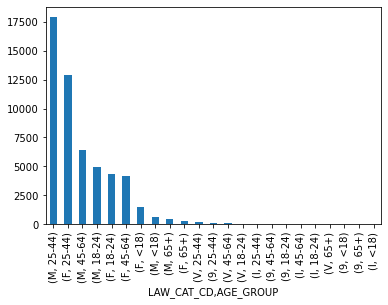

In [11]:
# Level of offense : Felony, Misdemeanor, Violation, Infraction
df.groupby(['LAW_CAT_CD','AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

Age_Group 25-44 has the most Misdemeanor and felony arrests!

In [12]:
df.groupby('PERP_SEX')['ARREST_KEY'].count()

PERP_SEX
F     8973
M    45072
U      531
Name: ARREST_KEY, dtype: int64

In [13]:
data_by_gender=[['Female',8973],['Male',45072],['Unidentified',531]]
dfG=pd.DataFrame(data_by_gender,columns=['Gender','Count'])

In [14]:
# Calcualte % of Total 
# Format as 2 digits after decimal with % sign - .map('{:.2%}'.format)
dfG['Percentage']=(dfG['Count']/dfG['Count'].sum()).map('{:.2%}'.format)
dfG

,Gender,Count,Percentage
0,Female,8973,16.44%
1,Male,45072,82.59%
2,Unidentified,531,0.97%


Male arrests are 5 times more than Female!

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

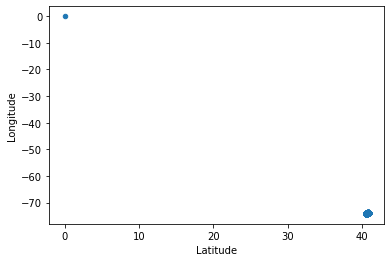

In [15]:
df.plot(kind="scatter",x='Latitude',y='Longitude') 

In [16]:
#Cleaning Task. Latitude for NY is ~40. removing rows with latitude as 0, to get a good plot
dfsub=df[(df['Latitude']>=40)]
dfsub.shape

(54575, 19)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

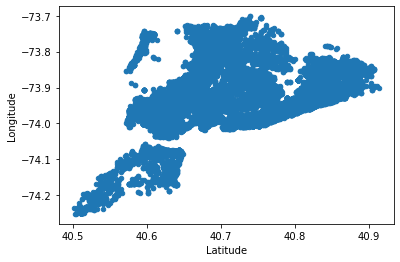

In [17]:
#plt.rcdefaults()
dfsub.plot(kind="scatter",x='Latitude',y='Longitude') 

#when the one row with Latitude as 0 was removed, the plot looks more like a map of New york-5 Boroughs! 

Text(0, 0.5, '')

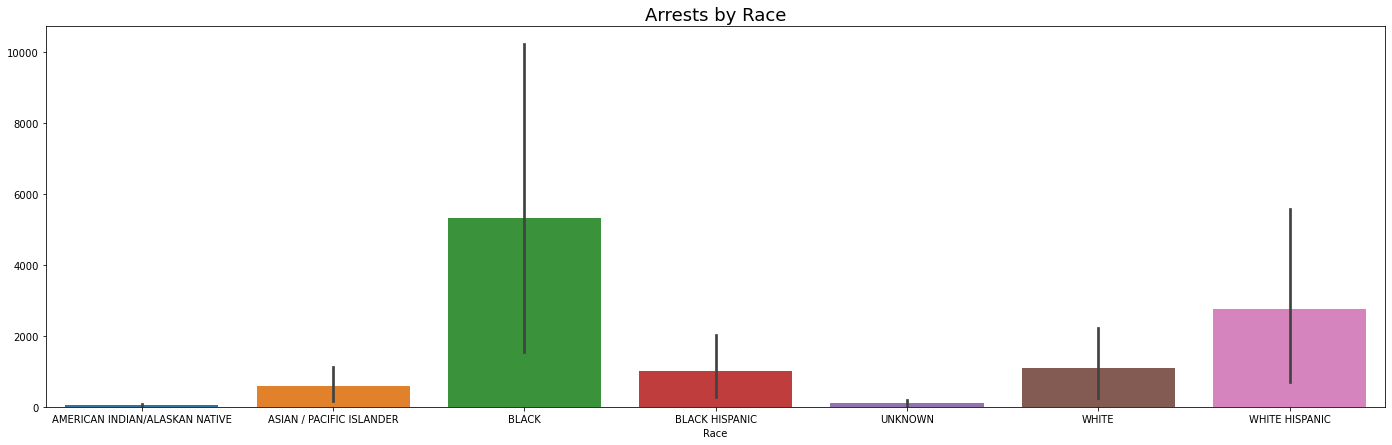

In [18]:
#create a pivot
race_borough=pd.pivot_table(data=df,index=['AGE_GROUP','PERP_RACE'],values='ARREST_BORO', aggfunc='count').reset_index()
plt.rcParams['figure.figsize']=(24,7)
#plotting the graph
sns.barplot(x='PERP_RACE', y='ARREST_BORO',data=race_borough)
#format the graph
plt.title("Arrests by Race",fontsize=18)
plt.xlabel('Race')
plt.ylabel(None)

Text(0, 0.5, '')

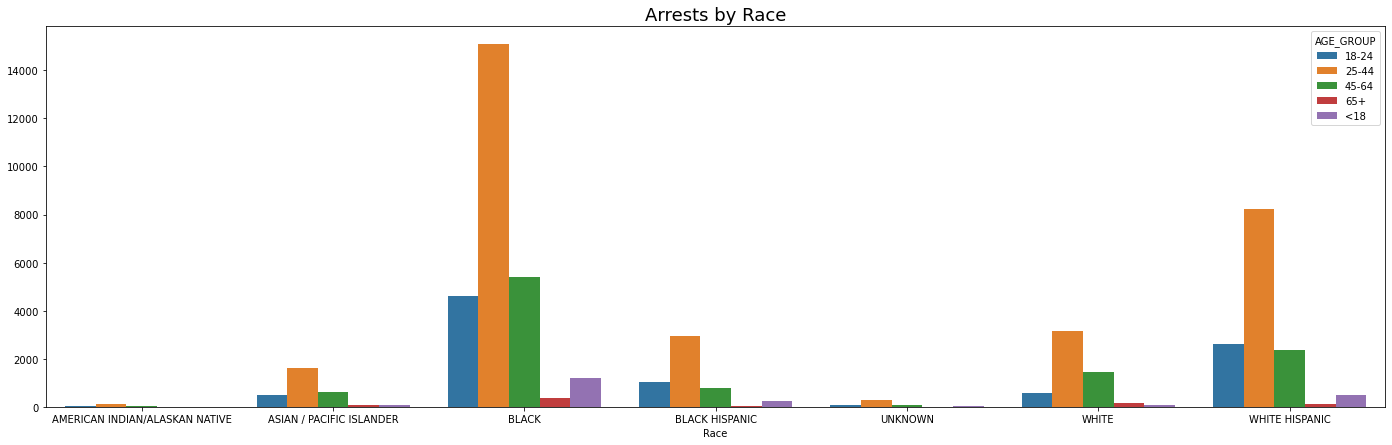

In [19]:
# graph to include age group
sns.barplot(x='PERP_RACE', y='ARREST_BORO',data=race_borough,hue='AGE_GROUP')
#format the graph
plt.title("Arrests by Race",fontsize=18)
plt.xlabel('Race')
plt.ylabel(None)

<AxesSubplot:xlabel='PERP_RACE', ylabel='ARREST_BORO'>

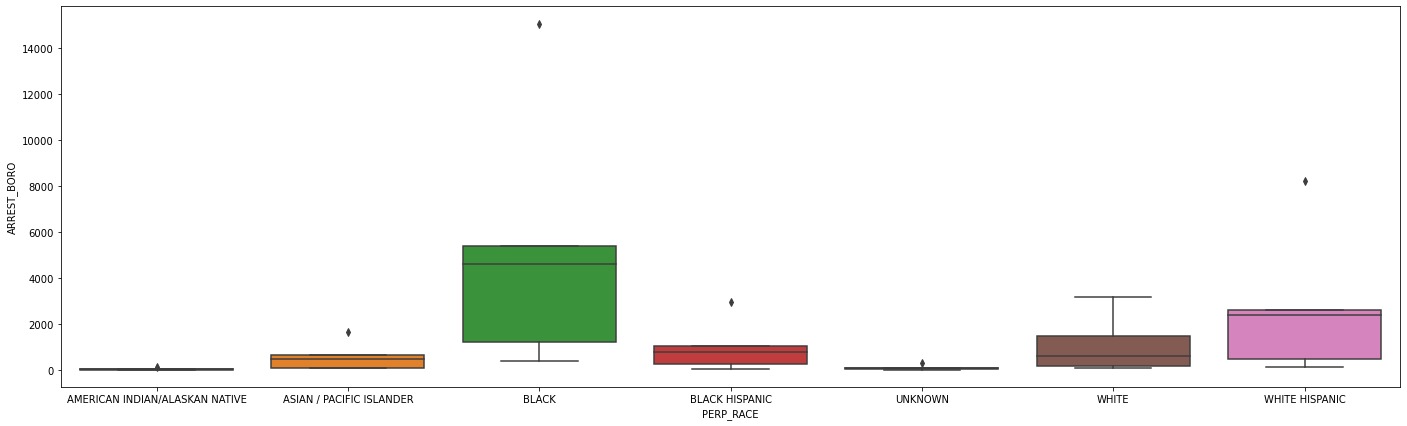

In [20]:
sns.boxplot(x='PERP_RACE', y='ARREST_BORO',data=race_borough)

Need to clean the data

In [21]:
# compare one borough to another
dfBronx=df[(df['ARREST_BORO']=='B')]
dfBronx.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.285600e+04,12827.000000,12827.00000,12856.000000,12856.000000,1.285600e+04,12856.000000,12856.000000,12856.000000
mean,2.635726e+08,417.965074,254.96141,45.021157,1.391179,1.014403e+06,246058.959941,40.841997,-73.891019
std,1.390627e+06,280.570661,142.99835,3.686238,9.929819,7.623937e+03,8329.750133,0.022852,0.027569
min,2.611815e+08,16.000000,101.00000,40.000000,0.000000,1.003104e+06,231388.000000,40.801749,-73.931886
25%,2.623621e+08,113.000000,112.00000,42.000000,0.000000,1.008354e+06,239188.000000,40.823147,-73.912901
50%,2.635527e+08,397.000000,341.00000,44.000000,0.000000,1.012618e+06,244511.000000,40.837774,-73.897447
75%,2.647218e+08,705.000000,344.00000,48.000000,0.000000,1.020183e+06,251919.000000,40.858093,-73.870168
max,2.659897e+08,969.000000,995.00000,52.000000,97.000000,1.044056e+06,271819.000000,40.912714,-73.783854


In [22]:
dfQueens=df[(df['ARREST_BORO']=='Q')]
dfQueens.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.162800e+04,11444.000000,11444.000000,11628.000000,11628.000000,1.162800e+04,11628.000000,11628.000000,11628.000000
mean,2.636100e+08,444.321304,247.122247,107.963106,0.669935,1.031154e+06,199837.589525,40.715049,-73.830821
std,1.415676e+06,291.694294,141.603838,4.511400,6.161450,1.530952e+04,15825.683904,0.043477,0.055175
min,2.611809e+08,49.000000,101.000000,100.000000,0.000000,9.957170e+05,147837.000000,40.572364,-73.958616
25%,2.623622e+08,114.000000,113.000000,104.000000,0.000000,1.019946e+06,191300.000000,40.691607,-73.871197
50%,2.636646e+08,397.000000,236.000000,108.000000,0.000000,1.032056e+06,200435.000000,40.716650,-73.827448
75%,2.647972e+08,739.000000,344.000000,113.000000,0.000000,1.041956e+06,212657.000000,40.750286,-73.791994
max,2.660041e+08,969.000000,995.000000,115.000000,97.000000,1.066940e+06,230741.000000,40.799867,-73.701605


In [23]:
# cleaning
#replace Borough Codes with Borough Names
df['ARREST_BORO'].replace('K','Brooklyn',inplace=True)
df['ARREST_BORO'].replace('B','Bronx',inplace=True)
df['ARREST_BORO'].replace('Q','Queens',inplace=True)
df['ARREST_BORO'].replace('M','Manhattan',inplace=True)
df['ARREST_BORO'].replace('S','Staten Island',inplace=True)

<AxesSubplot:xlabel='ARREST_BORO'>

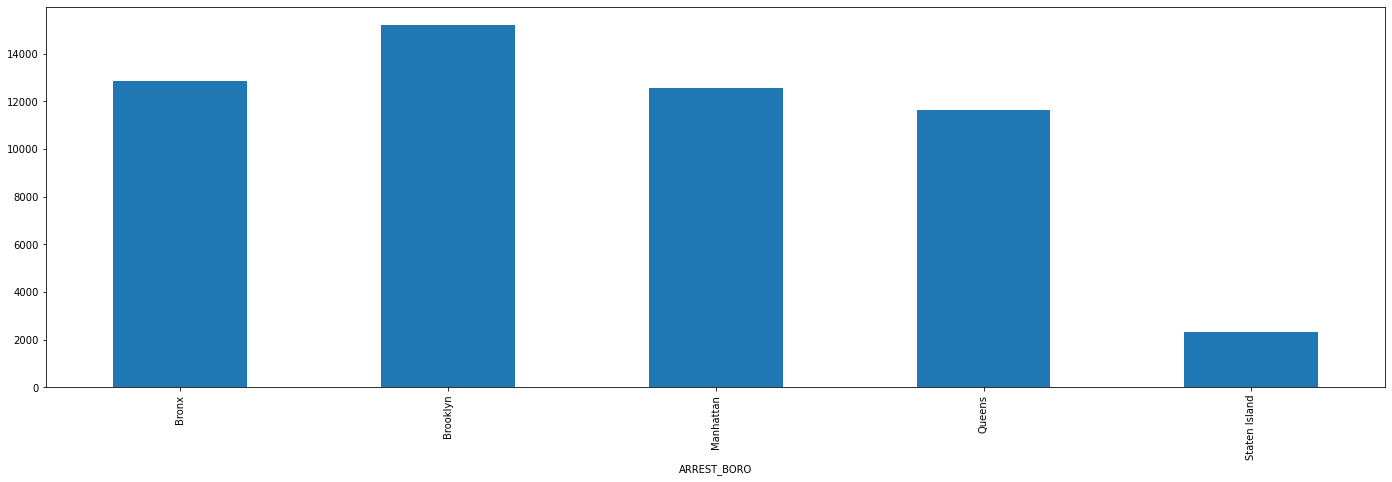

In [24]:
df.groupby('ARREST_BORO')['ARREST_KEY'].count().plot(kind='bar')

Brooklyn has the most arrests; but that could be because Brooklyn is the most populous among the five Boroughs

In [25]:
# which month has highest arrests recorded
df.groupby(df['ARREST_DATE'].dt.strftime('%B'))['ARREST_KEY'].count().sort_values()

ARREST_DATE
February    16738
January     18811
March       19027
Name: ARREST_KEY, dtype: int64

February has the least; but that could be because February has lesser number of days than other 2 months.

<AxesSubplot:xlabel='ARREST_DATE'>

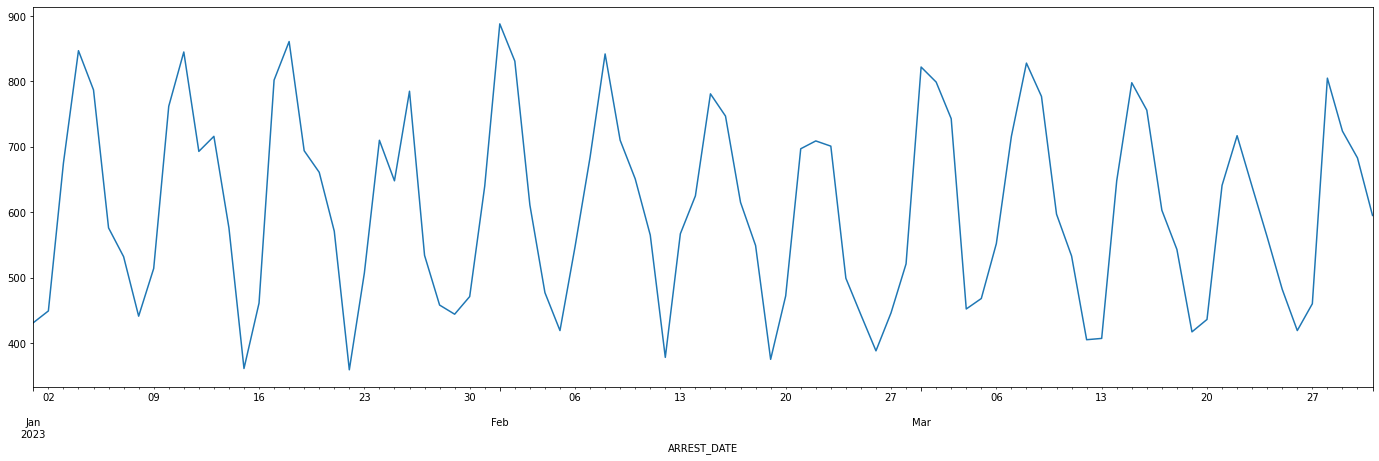

In [26]:
df.groupby(df['ARREST_DATE'])['ARREST_KEY'].count().plot()

There seems to be a pattern in the count of arrests. it peaks up and come down kind of regularly!

In [27]:
#Get the "day of the week" for the arrests
df['Day_Of_Arrest']=df['ARREST_DATE'].dt.day_name()

In [28]:
df.groupby(df['Day_Of_Arrest'])['ARREST_KEY'].count().sort_values()

Day_Of_Arrest
Sunday        5305
Saturday      6181
Monday        6289
Friday        7963
Tuesday       8926
Thursday      9602
Wednesday    10310
Name: ARREST_KEY, dtype: int64

Looks like Sunday has least and Wednesday has most.

In [29]:
# get data for Sunday and wednesdays alone -
dfSun=df[(df['Day_Of_Arrest']=='Sunday')]
dfSunWed=dfSun.append(df[(df['Day_Of_Arrest']=='Wednesday')])

<AxesSubplot:xlabel='ARREST_DATE'>

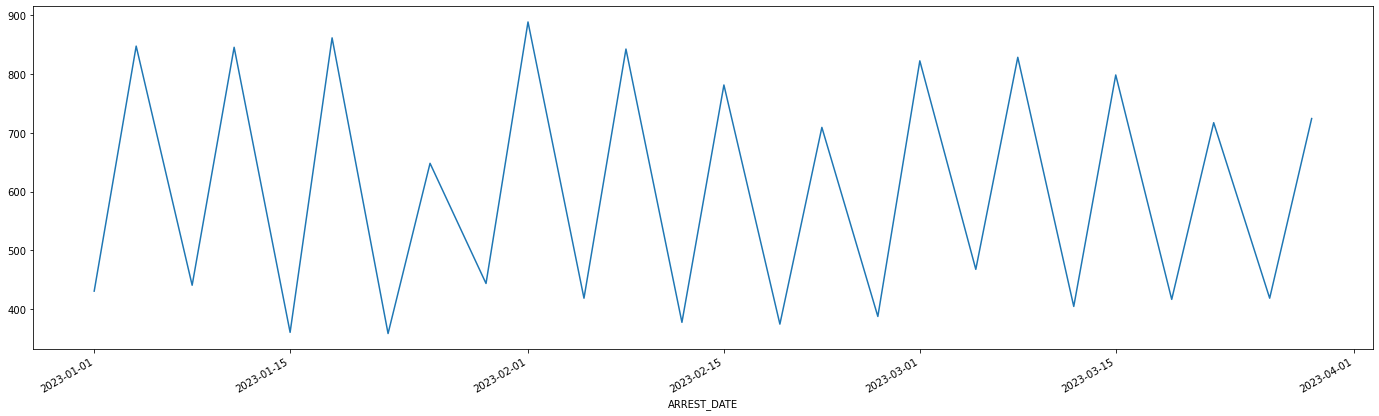

In [30]:
dfSunWed.groupby(df['ARREST_DATE'])['ARREST_KEY'].count().plot()

### Conclusion: 
1. AgeGroup 25-44 has the most Misdemeanor and Felony arrests.
2. Male have 5 times more than female arrests.
3. Sundays have the least count of arrests and Wednesdays have the most.